# Project Description

Investing requires a great deal of attention to media and thought about the potential for growth among companies. In the past few years, social media platforms such as reddit, twitter, and even tiktok have become venues for investors from all kinds of backgrounds to discuss companies and share research. Unfortunately, with this rise in social media investing has also come a flood of uninformed, immaterial, and sometimes completely falsified material about investments designed to lure unsuspecting audiences. 

Reddit has the unique position of being able to provide binary user-feedback on posts through upvotes and downvotes. As such, I chose to make my project using the Python Reddit API (PRAW) to scrape investment-based subreddits to filter posts for certain stock symbols as well as user engagement to streamline the process of searching for informative discussion about companies (NOT an endorsement for investing solely based on social media). 

Reddit does provide search functions as well as user-feedback filters that allow users to sort by chronology, popularity, and even controversy. However, these filters are often one-dimensional and only allow for users to search for one stock symbol at a time and manually comb through each post to see if there is anything of interest. This project focuses on creating more flexible filters as well as condensing information to make it easier to sort through.

# How to begin
The default watchlist begins with the following symbols: 'HITI', 'XSPA', 'TNXP', 'TELL', 'CTXR', 'APPL', 'GME', 'AMC', 'BABA', 'ADXS', and 'RIVN'. These can be added or removed using the add_ticker and remove_ticker functions. The kernels below the imports will create interactive menus to change the amount of posts to process and which subreddit to target. There will also be options to manually add or remove stocks from the filter.  

## Imports

In [1]:
from my_module.Reddit_Scraper import RedditScraper
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
from my_module.bar_graph import bar_graph
import pytest
import ipywidgets as widgets


## Set Values Using Widgets
The following cells are to use the functions in the class RedditScraper to find posts relating to stocks on the watchlist. The following slider and dropdown menu cells allow you to manipulate what subreddits and how many posts are shown in the general and filtered dataframes. 

You will not need to run the widget kernels again or do anything after moving the slider, changing the dropdown options, or typing in the text box. You only need to re-run the cells with RedditScraper functions to update the results.

In [2]:
post_num = widgets.IntSlider(min = 0, max= 250, value = 5,
                              step = 1, description = "Post Number")
post_num

IntSlider(value=5, description='Post Number', max=250)

In [3]:
subreddit = widgets.Dropdown(options = ['Pennystocks', 'WallstreetBets','SmallstreetBets', 
                                        'Stocks', 'EducatedInvesting'],
                            description = "Select which subreddit.",
                            style = {'description_width':'initial'})
subreddit

Dropdown(description='Select which subreddit.', options=('Pennystocks', 'WallstreetBets', 'SmallstreetBets', '…

## Dataframe Generation Kernels
Re-run the following kernel every time a value on the widgets is changed to refresh the data results.

In [5]:
project = RedditScraper(subreddit.value, post_num.value)
project_df = project.create_dataframe()
project_df.head(5)

,title,score,comments,body
0,Big Move with $TNXP,4,3,It’s short term bullish. Good sign with instit...
1,Price going down after good announcements?,0,6,Hey everyone been following nti for some time ...
2,Molecule $MLCL gets Purchase Order with n BC,2,7,Molecule to have cannabis infused beverages in...
3,$INPX the next 500% mover,9,5,\n\nSysorex completed a merger with TTM Digit...
4,Current & Former Penny Stocks Wth Recent Insid...,13,1,Good article I just read about insiders report...


## Watchlist Manipulation
Input a stock symbol under tick_add and then run the kernel under it to add a stock to the watchlist. 
Input a stock symbol under tick_remove to remove it from the watchlist. 

There is already a pre-loaded list of symbols as a default to ensure there is enough data collected.  

In [6]:
tick_add = widgets.Text(
    value = '',
    disabled = False)
tick_add

Text(value='')

In [7]:
project.add_ticker(tick_add.value)

['VYNE',
 'CTXR',
 'RIVN',
 'XSPA',
 'AMC',
 'HITI',
 'GME',
 'APPL',
 'ADXS',
 'TELL',
 'TNXP',
 'BABA']

In [8]:
tick_remove = widgets.Text(value = '',
              disabled = False)
tick_remove

Text(value='')

In [9]:
project.remove_ticker(tick_remove.value)
project.list_tickers()

['VYNE',
 'CTXR',
 'RIVN',
 'XSPA',
 'AMC',
 'HITI',
 'APPL',
 'ADXS',
 'TELL',
 'TNXP',
 'BABA']

In [10]:
project_watchlist = project.filter_dataframe()
project_watchlist

,title,score,comments,body,url
0,Big Move with $TNXP,2,3,It’s short term bullish. Good sign with instit...,https://www.reddit.com/r/pennystocks/comments/...
1,Current & Former Penny Stocks Wth Recent Insid...,12,1,Good article I just read about insiders report...,https://www.reddit.com/r/pennystocks/comments/...
2,Is $TELL ready to bounce after a 40% sale?,104,24,Tellurian has fallen back to an amazingly chea...,https://www.reddit.com/r/pennystocks/comments/...
3,$HITI back in penny land.,13,11,Just pointing it out.\n\nLast time I did every...,https://www.reddit.com/r/pennystocks/comments/...
4,$TNXP’s Live Virus Vaccine just became a whole...,7,27,Omicron Damn Near Can’t Get Worse!\n\nWhat we ...,https://www.reddit.com/r/pennystocks/comments/...
5,"CDC expands program with $XSPA, plus new Benzi...",56,26,,https://i.redd.it/s9zq8jf1n8381.jpg
6,$XSPA - CDC expands partnership to track omicr...,105,28,,https://www.reddit.com/gallery/r61xrp
7,$XSPA ($1.75) in collaboration with Gingko to ...,9,8,\n\n## XpresSpa Group and Ginkgo Bioworks Col...,https://www.reddit.com/r/pennystocks/comments/...


### Generate bar graphs of the most mentioned stocks in the top investing subreddits.

This is just to generate a list of potential stock symbols that are being discussed that can then be researched further and potentially added to the watch list. For this graph I filtered the text in post titles with the assumptions that stock symbols lie between 2 and 5 letter abbreviations and are all upper case. Unfortunately, this sometimes catches non-stock abbreviations and also excludes 1 letter tickers. However, this was the only screen I could think of to phase out other random uppercase letters. 

They also require a high post_num value on the slider (>150) to get meaningful results. 

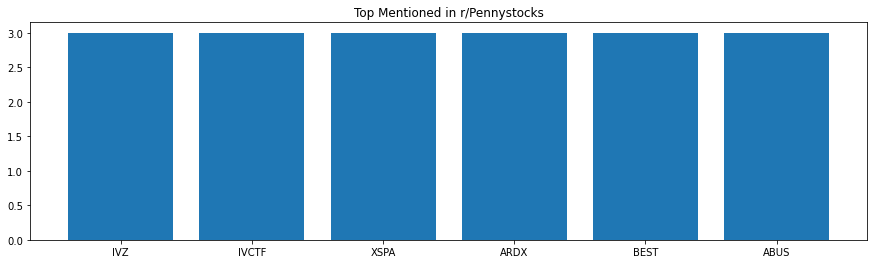

In [11]:
bar_graph(subreddit.value, post_num.value)

In [12]:
!pytest test_functions.py

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.5, py-1.10.0, pluggy-1.0.0
rootdir: /home/dkoh/Project_COGS18_FA21
plugins: anyio-3.2.1
collected 4 items                                                              

test_functions.py ....                                                   [100%]

============================== 4 passed in 2.73s ===============================


#### Extra Credit (*optional*)


1. I had next to no previous coding knowledge prior to COGS18. I have taken a data science course that briefly used Python just to clean data, but didn't go in-depth into anything outside of dataframe manipulation in pandas. I feel like I learned a lot, especially when doing research and working through this project.

2. Data given in practice problems is so easy to work with because the hard work of cleaning and collecting it has usually already been done. As such, my biggest challenge was not only in learning how to use Reddit's API to scrape post data, but also in figuring out how to clean that data and remove as much noise as possible to make it easier to filter and process. Learning to use "dirty" data to extract the information I needed was a really challenging process, but ultimately I feel like I have improved a lot in terms of both understanding code and in figuring out solutions to obstacles the data might present. 
